<a href="https://colab.research.google.com/github/seyma-altiparmak/sarcasm/blob/main/sarcasmrecv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sarcasm Recognition**
### **used dataset :** kaggle dataset

In [ ]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('/content/context/train-balanced-sarcasm.csv')
unbalanced_test_df = pd.read_csv('/content/context/test-unbalanced.csv')
balanced_test_df = pd.read_csv('/content/context/test-balanced.csv')

# Check the first few rows to understand the structure of the datasets
print(train_df.head())
print(unbalanced_test_df.head())
print(balanced_test_df.head())

   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  


In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download stopwords if not already done
nltk.download('stopwords')

# Assuming you're reading from a CSV file
df = pd.read_csv('/content/context/train-balanced-sarcasm.csv')

# Define the text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):  # Check if the text is not a string (e.g., NaN)
        return ''  # Return an empty string if the text is not a valid string

    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Join the words back into a single string

# Ensure that any NaN or non-string values in the 'comment' column are handled
df['comment'] = df['comment'].fillna('')  # Replace NaN values with an empty string

# Apply the preprocessing function to the 'comment' column
df['processed_text'] = df['comment'].apply(preprocess_text)

# Check the first few rows of the DataFrame to verify the changes
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  \
0  Yeah, I get that argument. At this point, I'd ...  

In [ ]:
print(df.columns)

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment', 'processed_text'],
      dtype='object')


In [ ]:
# Try loading the test datasets again with no headers
balanced_test_df = pd.read_csv('/content/context/test-balanced.csv', header=None)  # Update with the correct path
unbalanced_test_df = pd.read_csv('/content/context/test-unbalanced.csv', header=None)  # Update with the correct path

# Verify the columns
print("Columns in balanced_test_df:", balanced_test_df.columns)
print("Columns in unbalanced_test_df:", unbalanced_test_df.columns)

Columns in balanced_test_df: Index([0, 1, 2], dtype='int64')
Columns in unbalanced_test_df: Index([0, 1, 2], dtype='int64')


In [ ]:
# Check the first few rows of preprocessed text to ensure it contains meaningful words
train_df['comment'] = train_df['comment'].fillna('')
train_df['processed_text'] = train_df['comment'].apply(preprocess_text)
print("\nSample preprocessed train data (first 5 rows):")
print(train_df['processed_text'].head())


Sample preprocessed train data (first 5 rows):
0                                               NC NH.
1    know west teams play west teams east teams right?
2    underdogs earlier today, since Gronk's announc...
3           meme funny none "new york nigga" ones are.
4                                 could use one tools.
Name: processed_text, dtype: object


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the datasets without headers (header=None) and manually assign column names
train_df = pd.read_csv('/content/context/train-balanced-sarcasm.csv')  # Make sure you are providing the correct path

# Assuming your balanced_test and unbalanced_test have only 3 columns each:
balanced_test_df = pd.read_csv('/content/context/test-balanced.csv', header=None)
unbalanced_test_df = pd.read_csv('/content/context/test-unbalanced.csv', header=None)

# Assign appropriate column names based on the actual number of columns in each DataFrame
# For the training data, which has 9 columns (adjust based on your data)
train_df.columns = ['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc','sub']

# For the test data, assuming they only have 3 columns, we should assign appropriate names
# If the test files only have 'comment', 'label', and one other column (such as 'author' or 'date'), adjust accordingly
balanced_test_df.columns = ['comment', 'label', 'extra_column']  # Adjust 'extra_column' if necessary
unbalanced_test_df.columns = ['comment', 'label', 'extra_column']  # Adjust 'extra_column' if necessary

# Fill NaN values with empty strings in the 'comment' column
train_df['comment'] = train_df['comment'].fillna('')  # Replace NaN with empty strings
balanced_test_df['comment'] = balanced_test_df['comment'].fillna('')  # Replace NaN with empty strings
unbalanced_test_df['comment'] = unbalanced_test_df['comment'].fillna('')  # Replace NaN with empty strings

# Apply preprocessing (assuming preprocess_text is already defined)
train_df['processed_text'] = train_df['comment'].apply(preprocess_text)
balanced_test_df['processed_text'] = balanced_test_df['comment'].apply(preprocess_text)
unbalanced_test_df['processed_text'] = unbalanced_test_df['comment'].apply(preprocess_text)

# Strip any extra whitespace from column names
train_df.columns = train_df.columns.str.strip()
balanced_test_df.columns = balanced_test_df.columns.str.strip()
unbalanced_test_df.columns = unbalanced_test_df.columns.str.strip()

# Verify the columns to ensure 'processed_text' exists in each DataFrame
print("Columns in train_df:", train_df.columns)
print("Columns in balanced_test_df:", balanced_test_df.columns)
print("Columns in unbalanced_test_df:", unbalanced_test_df.columns)

Columns in train_df: Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'sub', 'processed_text'],
      dtype='object')
Columns in balanced_test_df: Index(['comment', 'label', 'extra_column', 'processed_text'], dtype='object')
Columns in unbalanced_test_df: Index(['comment', 'label', 'extra_column', 'processed_text'], dtype='object')


In [ ]:
# Make sure 'processed_text' exists in all dataframes
assert 'processed_text' in train_df.columns, "'processed_text' not found in train_df"
assert 'processed_text' in balanced_test_df.columns, "'processed_text' not found in balanced_test_df"
assert 'processed_text' in unbalanced_test_df.columns, "'processed_text' not found in unbalanced_test_df"

# Define features and labels
X_train = train_df['processed_text']  # Use 'processed_text' for features
y_train = train_df['label']

X_balanced_test = balanced_test_df['processed_text']
y_balanced_test = balanced_test_df['label']

X_unbalanced_test = unbalanced_test_df['processed_text']
y_unbalanced_test = unbalanced_test_df['label']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data (balanced and unbalanced) using the already fitted vectorizer
X_balanced_test_tfidf = vectorizer.transform(X_balanced_test)
X_unbalanced_test_tfidf = vectorizer.transform(X_unbalanced_test)

# Verify the resulting shapes
print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Balanced Test TF-IDF shape:", X_balanced_test_tfidf.shape)
print("Unbalanced Test TF-IDF shape:", X_unbalanced_test_tfidf.shape)

Train TF-IDF shape: (1010826, 167432)
Balanced Test TF-IDF shape: (32333, 167432)
Unbalanced Test TF-IDF shape: (63998, 167432)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

# Sample sarcastic vocabulary
Vocabulary = [
    "great", "awesome", "fantastic", "perfect", "unbelievable", "of course", "totally", "sure",
    "definitely", "thank you", "appreciate", "thanks so much", "ridiculous", "insane", "good job",
    "well done", "nice work", "really", "seriously", "wow", "amazing", "beautiful", "gorgeous",
    "just what I needed", "how original", "what a surprise", "yeah right", "oh really",
    "so much fun", "oh that makes sense", "just great", "couldn't have been worse", "good for you",
    "nice one", "so thoughtful", "so considerate", "well, that's just perfect", "can't wait",
    "yeah, totally", "sure, why not", "I’m sure that’s going to be a huge success", "thanks for nothing",
    "you’re a genius", "I’m so glad", "you shouldn’t have", "how nice of you", "thank you so much",
    "oh, I just love waiting", "yeah, sure", "thanks for the help", "this is fun", "oh, this is great",
    "I can’t wait for this to be over", "oh sure, I’m so excited", "what a pleasant surprise", "no problem",
    "what a treat", "wow, amazing", "how thoughtful", "you've outdone yourself", "I can't believe it"
]

# Example dataset
train_df = pd.DataFrame({
    'comment': [
        "Wow, great job on that!",
        "Oh, awesome, just what I needed!",
        "You're such a genius, really!",
        "Yeah, that was fantastic... not."
    ]
})

# Apply the TfidfVectorizer normally (without custom tokenizer)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_df['comment'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the transformed matrix (TF-IDF scores)
print("\nTF-IDF Matrix:")
print(X.toarray())

# Extract words from vocabulary that are also in the sarcastic Vocabulary list
sarcastic_columns = [i for i, word in enumerate(feature_names) if word in Vocabulary]

# Get the sarcastic words from the TF-IDF matrix
sarcastic_words = [feature_names[i] for i in sarcastic_columns]

print("\nSarcastic words found in the comments:")
print(sarcastic_words)



TF-IDF Matrix:
[[0.         0.         0.         0.57735027 0.57735027 0.
  0.         0.         0.         0.57735027 0.        ]
 [0.5        0.         0.         0.         0.         0.5
  0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.70710678 0.         0.         0.
  0.         0.         0.70710678 0.         0.        ]
 [0.         0.70710678 0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678]]

Sarcastic words found in the comments:
['awesome', 'fantastic', 'great', 'really', 'wow']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data (balanced and unbalanced) using the already fitted vectorizer
X_balanced_test_tfidf = vectorizer.transform(X_balanced_test)
X_unbalanced_test_tfidf = vectorizer.transform(X_unbalanced_test)

# Verify the resulting shapes
print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Balanced Test TF-IDF shape:", X_balanced_test_tfidf.shape)
print("Unbalanced Test TF-IDF shape:", X_unbalanced_test_tfidf.shape)

# Optional: Check the first few rows of the transformed data
# For large datasets, printing the entire matrix may not be ideal, but you can view a few sample rows
print("\nSample transformed train data (first 5 rows):")

# Convert the sparse matrix to a dense format for easier inspection (only the first 5 rows)
sample_train_data = X_train_tfidf[:5].todense()

# Convert to a DataFrame to display the words associated with each feature
sample_train_df = pd.DataFrame(sample_train_data, columns=vectorizer.get_feature_names_out())

# Display the first 5 rows of the transformed training data
print(sample_train_df)

Train TF-IDF shape: (1010826, 167125)
Balanced Test TF-IDF shape: (32333, 167125)
Unbalanced Test TF-IDF shape: (63998, 167125)

Sample transformed train data (first 5 rows):
    00  000  0000  000000  00000000000000  \
0  0.0  0.0   0.0     0.0             0.0   
1  0.0  0.0   0.0     0.0             0.0   
2  0.0  0.0   0.0     0.0             0.0   
3  0.0  0.0   0.0     0.0             0.0   
4  0.0  0.0   0.0     0.0             0.0   

   000000000000000000000000000000000001  000000000000001  000000000000438385  \
0                                   0.0              0.0                 0.0   
1                                   0.0              0.0                 0.0   
2                                   0.0              0.0                 0.0   
3                                   0.0              0.0                 0.0   
4                                   0.0              0.0                 0.0   

   0000000001  0000000013  ...  zzzzzzzzzzz  zzzzzzzzzzzap  zzzzzzzzzzzzz

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_df = pd.read_csv('/content/context/train-balanced-sarcasm.csv')

train_df.columns = ['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc','sub']
# Assuming 'processed_text' is the feature and 'label' is the target
X = train_df['comment']  # This should be the processed text (after vectorization)
y = train_df['label']  # Assuming there's a 'label' column for sarcasm (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
vectorizer = TfidfVectorizer()

# Check for NaN values in the training and testing data
print(X_train.isnull().sum())  # For training data
print(X_test.isnull().sum())   # For testing data
# Drop rows with NaN values in the 'processed_text' column
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure that the corresponding target labels (y_train, y_test) are also filtered accordingly
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Fill NaN values with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Fit and transform the training data, and transform the test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)
# Predict on the test set
y_pred = model.predict(X_test_vec)

43
12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)  # Test verisi için doğruluk
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 69.11%
Test Accuracy: 69.11%
Confusion Matrix:
[[73755 27342]
 [35096 65961]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train Accuracy (last epoch): 0.6223737566734313
Validation Accuracy (last epoch): 0.6193001375189212


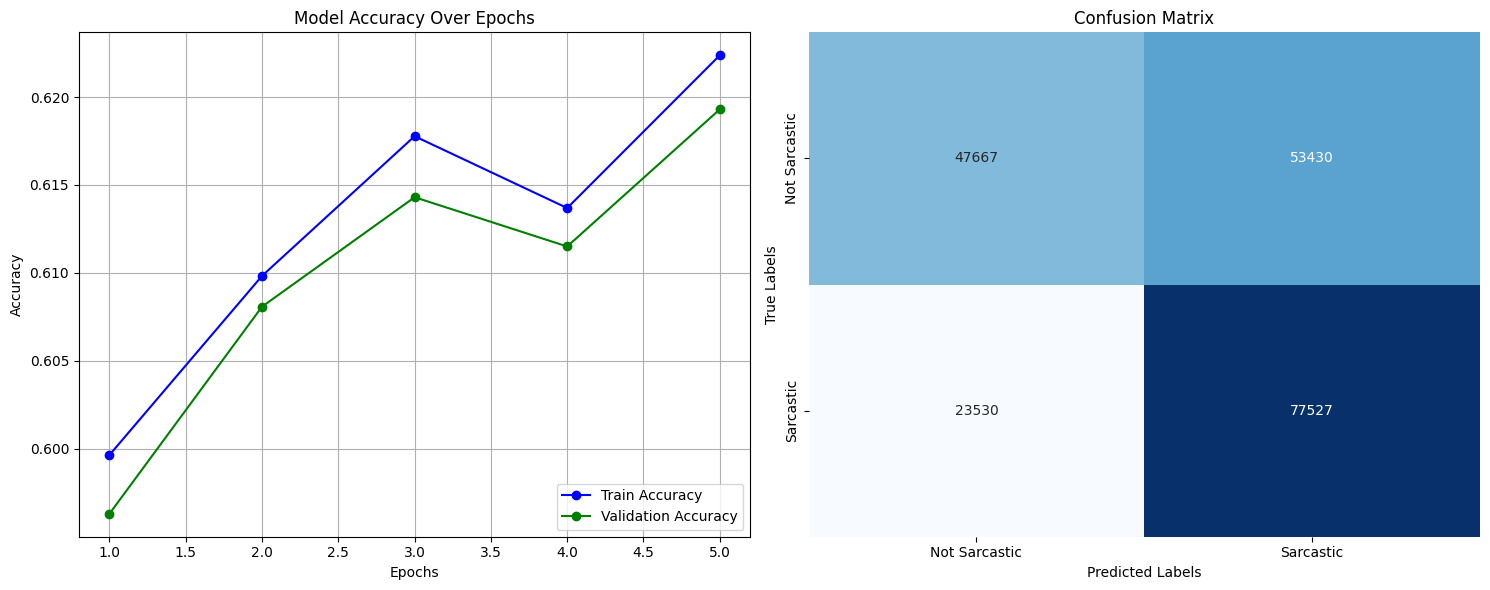

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Eğitim ve doğrulama doğruluğunu saklamak için listeler
train_acc_list = []
valid_acc_list = []
epochs = [1, 2, 3, 4, 5]  # Epoch sayısı

# Modelin iteratif eğitimi
model = LogisticRegression(max_iter=1, warm_start=True)  # warm_start ile modeli tekrar eğitebiliriz
for epoch in epochs:
    model.fit(X_train_vec, y_train)
    train_acc_list.append(model.score(X_train_vec, y_train))  # Eğitim doğruluğu
    valid_acc_list.append(accuracy_score(y_test, model.predict(X_test_vec)))  # Doğrulama doğruluğu

# Hata matrisi
cm = confusion_matrix(y_test, model.predict(X_test_vec))

print(f"Train Accuracy (last epoch): {train_acc_list[-1]}")
print(f"Validation Accuracy (last epoch): {valid_acc_list[-1]}")

# Grafiklerin boyutunu ayarla
plt.figure(figsize=(15, 6))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_list, label='Train Accuracy', marker='o', color='blue')
plt.plot(epochs, valid_acc_list, label='Validation Accuracy', marker='o', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Hata Matrisini Görselleştirme (Confusion Matrix)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Grafiklerin sıkışmaması için düzenleme
plt.tight_layout()
plt.show()
